<a href="https://colab.research.google.com/github/mangleshpatidar/DO101-apps/blob/master/SMAI_Ass1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate


### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

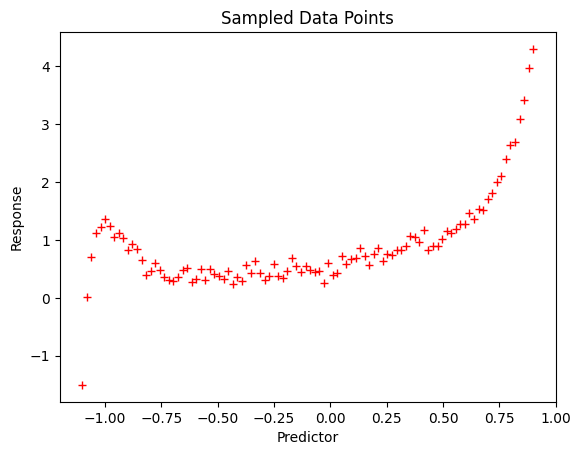

In [78]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1
    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [79]:
predictor.shape


(100,)

In [80]:
response.shape

(100,)

In [86]:
def linear_regression_fit(x, y, learning_rate=0.01, epochs=1000):
    beta0 = 0
    beta1 = 0
    m = len(x)
    for epoch in range(epochs):
        y_pred = beta0 + beta1 * x
        grad0 = (1/m) * np.sum(y_pred - y)
        grad1 = (1/m) * np.sum((y_pred - y) * x)
        beta0 = beta0 - learning_rate * grad0
        beta1 = beta1 - learning_rate * grad1

    return beta0, beta1

def predict(x, beta0, beta1):
    return beta0 + beta1 * x

beta0, beta1 = linear_regression_fit(predictor, response)
y_pred = predict(predictor, beta0, beta1)




In [88]:
print(y_pred)

[0.06642804 0.08322089 0.10001373 0.11680658 0.13359943 0.15039227
 0.16718512 0.18397797 0.20077081 0.21756366 0.2343565  0.25114935
 0.2679422  0.28473504 0.30152789 0.31832074 0.33511358 0.35190643
 0.36869928 0.38549212 0.40228497 0.41907781 0.43587066 0.45266351
 0.46945635 0.4862492  0.50304205 0.51983489 0.53662774 0.55342058
 0.57021343 0.58700628 0.60379912 0.62059197 0.63738482 0.65417766
 0.67097051 0.68776336 0.7045562  0.72134905 0.73814189 0.75493474
 0.77172759 0.78852043 0.80531328 0.82210613 0.83889897 0.85569182
 0.87248466 0.88927751 0.90607036 0.9228632  0.93965605 0.9564489
 0.97324174 0.99003459 1.00682744 1.02362028 1.04041313 1.05720597
 1.07399882 1.09079167 1.10758451 1.12437736 1.14117021 1.15796305
 1.1747559  1.19154874 1.20834159 1.22513444 1.24192728 1.25872013
 1.27551298 1.29230582 1.30909867 1.32589152 1.34268436 1.35947721
 1.37627005 1.3930629  1.40985575 1.42664859 1.44344144 1.46023429
 1.47702713 1.49381998 1.51061282 1.52740567 1.54419852 1.56099

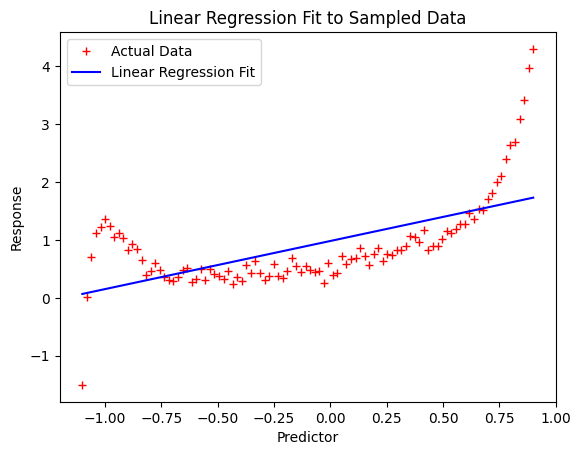

In [87]:
plt.plot(predictor, response, 'r+', label='Actual Data')
plt.plot(predictor, y_pred, 'b-', label='Linear Regression Fit')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression Fit to Sampled Data')
plt.legend()
plt.show()

In [119]:
def polynomial_regression_fit(x, y, degree, learning_rate=0.01, epochs=1000):
    betas = np.zeros(degree + 1)
    m = len(x)
    for epoch in range(epochs):
        y_pred = np.dot(np.vander(x, degree + 1), betas)
        grads = (1/m) * np.dot(np.vander(x, degree + 1).T, (y_pred - y))
        betas = betas - learning_rate * grads

    return betas

def predict_polynomial(x, betas):
    degree = len(betas) - 1
    return np.dot(np.vander(x, degree + 1), betas)



In [125]:
def ridge_regression_fit(x, y, degree, alpha=0.01, learning_rate=0.01, epochs=1000):
    betas = np.zeros(degree + 1)
    m = len(x)
    for epoch in range(epochs):
        y_pred = np.dot(np.vander(x, degree + 1), betas)
        ridge_term = alpha * np.sum(betas[1:]**2)
        grads = (1/m) * np.dot(np.vander(x, degree + 1).T, (y_pred - y)) + 2 * ridge_term * betas
        betas = betas - learning_rate * grads

    return betas

def lasso_regression_fit(x, y, degree, alpha=0.01, learning_rate=0.01, epochs=1000):
    betas = np.zeros(degree + 1)
    m = len(x)
    for epoch in range(epochs):
        y_pred = np.dot(np.vander(x, degree + 1), betas)
        lasso_term = alpha * np.sign(betas)
        grads = (1/m) * np.dot(np.vander(x, degree + 1).T, (y_pred - y)) + lasso_term
        betas = betas - learning_rate * grads

    return betas


In [122]:
def find_best_degree(x, y, max_degree, learning_rate=0.01, epochs=1000):
    best_degree = 0
    best_error = float('inf')

    for degree in range(1, max_degree +1):
        betas = polynomial_regression_fit(x, y, degree, learning_rate, epochs)
        y_pred = predict_polynomial(x, betas)

        error = np.mean((y - y_pred) ** 2)

        if error < best_error:
            best_error = error
            best_degree = degree

    return best_degree

beta0_linear, beta1_linear = linear_regression_fit(predictor, response)
y_pred_linear = predict(predictor, beta0_linear, beta1_linear)

max_degree = 22
best_degree = find_best_degree(predictor, response, max_degree)

betas_poly = polynomial_regression_fit(predictor, response, best_degree)
y_pred_poly = predict_polynomial(predictor, betas_poly)




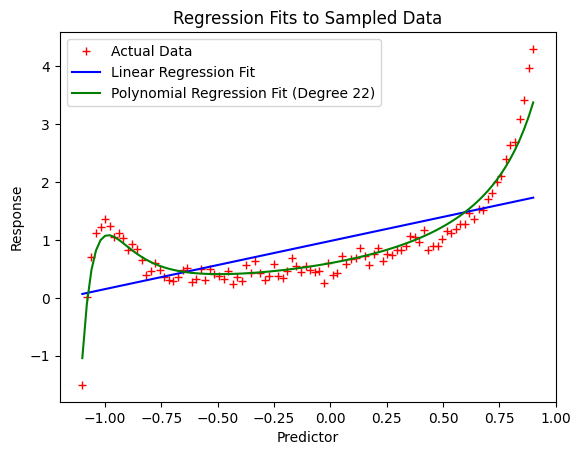

In [123]:
plt.plot(predictor, response, 'r+', label='Actual Data')
plt.plot(predictor, y_pred_linear, 'b-', label='Linear Regression Fit')
plt.plot(predictor, y_pred_poly, 'g-', label=f'Polynomial Regression Fit (Degree {best_degree})')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Regression Fits to Sampled Data')
plt.legend()
plt.show()



In [96]:
error_linear = np.mean((response - y_pred_linear) ** 2)
error_poly = np.mean((response - y_pred_poly) ** 2)

table = [["Linear Regression :", error_linear],
         [f"Polynomial Regression (Best Degree {best_degree}):", error_poly]]

headers = ["Experiment", "Mean Squared Error"]
print(tabulate(table, headers, tablefmt="grid"))

+-----------------------------------------+----------------------+
| Experiment                              |   Mean Squared Error |
+=========================================+======================+
| Linear Regression :                     |            0.389796  |
+-----------------------------------------+----------------------+
| Polynomial Regression (Best Degree 25): |            0.0355352 |
+-----------------------------------------+----------------------+


In [144]:
alpha = 0.01

degree_high = 21
betas_poly = polynomial_regression_fit(predictor, response, degree_high)
y_pred_high = predict_polynomial(predictor, betas_poly)

degree = 21
learning_rate = 0.01
epochs = 1000

ridge_betas = ridge_regression_fit(predictor, response, degree, alpha, learning_rate, epochs)

lasso_betas = lasso_regression_fit(predictor, response, degree, alpha, learning_rate, epochs)

y_pred_ridge = predict_polynomial(predictor, ridge_betas)
y_pred_lasso = predict_polynomial(predictor, lasso_betas)



In [145]:
print("Ridge Regression Coefficients:", ridge_betas)
print("Lasso Regression Coefficients:", lasso_betas)
print("Predictions (Ridge):", y_pred_ridge)
print("Predictions (Lasso):", y_pred_lasso)



Ridge Regression Coefficients: [ 0.21223284 -0.10005459  0.14776777 -0.0211526   0.10040546  0.0490845
  0.06876283  0.1143824   0.05252075  0.17855736  0.0527048   0.24580027
  0.07227404  0.32099972  0.11735272  0.40996969  0.20007134  0.51873154
  0.34677143  0.64579177  0.63615603  0.60364299]
Lasso Regression Coefficients: [ 2.24794200e-01 -7.89525663e-02  1.36170178e-01 -5.50772758e-05
  7.04250781e-02 -4.94859338e-05  2.54467599e-02  1.03282946e-02
  6.84452824e-04  9.58358864e-02  9.01295871e-05  1.84684594e-01
  1.80371395e-02  2.83139114e-01  7.16171307e-02  3.98558226e-01
  1.72653892e-01  5.38245811e-01  3.52775897e-01  6.98046002e-01
  7.04725191e-01  6.14832997e-01]
Predictions (Ridge): [-0.85736123 -0.07776595  0.41710498  0.71610201  0.88253685  0.96110073
  0.98300423  0.96977286  0.93603235  0.8915386   0.84264653  0.79336454
  0.74610508  0.7022138   0.66233878  0.62668499  0.59518717  0.56762546
  0.54370093  0.52308378  0.50544282  0.49046257  0.47785227  0.4673497

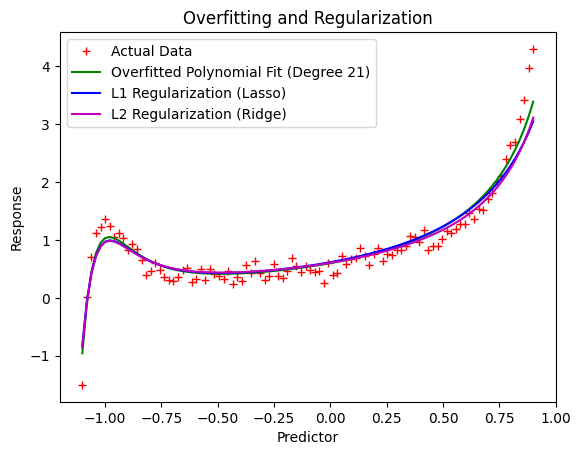

In [146]:
plt.plot(predictor, response, 'r+', label='Actual Data')
plt.plot(predictor, y_pred_high, 'g-', label=f'Overfitted Polynomial Fit (Degree {degree_high})')
plt.plot(predictor, y_pred_lasso, 'b-', label=f'L1 Regularization (Lasso)')
plt.plot(predictor, y_pred_ridge, 'm-', label=f'L2 Regularization (Ridge)')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Overfitting and Regularization')
plt.legend()
plt.show()


In [148]:
mse = np.mean((response - y_pred_high) ** 2)
rmse = np.sqrt(mse)
r_squared = 1 - (np.sum((response - y_pred_high) ** 2) / np.sum((response - np.mean(response)) ** 2))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) score:", r_squared)

Mean Squared Error (MSE): 0.04235909879731335
Root Mean Squared Error (RMSE): 0.20581326195683639
R-squared (R^2) score: 0.9342577349951012


In [149]:
mse1 = np.mean((response - y_pred_lasso) ** 2)
rmse1 = np.sqrt(mse1)
r_squared1 = 1 - (np.sum((response - y_pred_lasso) ** 2) / np.sum((response - np.mean(response)) ** 2))

print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared (R^2) score:", r_squared1)

Mean Squared Error (MSE): 0.06504374704674767
Root Mean Squared Error (RMSE): 0.2550367562661266
R-squared (R^2) score: 0.8990506555458139


In [150]:
mse2 = np.mean((response - y_pred_ridge) ** 2)
rmse2 = np.sqrt(mse2)
r_squared2 = 1 - (np.sum((response - y_pred_ridge) ** 2) / np.sum((response - np.mean(response)) ** 2))

print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R^2) score:", r_squared2)

Mean Squared Error (MSE): 0.061198649711516014
Root Mean Squared Error (RMSE): 0.24738360841316065
R-squared (R^2) score: 0.9050183322707601


In [152]:
error_metrics = [
    ["MLR     ", mse1, rmse1, r_squared1],
    ["MLR with Lasso", mse, rmse, r_squared],
    ["MLR with Ridge", mse2, rmse2, r_squared2]

]
headers = ["Experiment", "Mean Squared Error", "Root Mean Squared Error", "R-squared (R^2) score"]
print("\nError Metrics:")
print(tabulate(error_metrics, headers=headers))


Error Metrics:
Experiment        Mean Squared Error    Root Mean Squared Error    R-squared (R^2) score
--------------  --------------------  -------------------------  -----------------------
MLR                        0.0650437                   0.255037                 0.899051
MLR with Lasso             0.0423591                   0.205813                 0.934258
MLR with Ridge             0.0611986                   0.247384                 0.905018


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [45]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [46]:
data = pd.read_csv('credit.csv')

print(data.head())

X = data[[ 'Income','Limit', 'Rating', 'Cards', 'Age', 'Education']].values

y = data['Balance'].values

    Income  Limit  Rating  Cards  Age  Education  Balance
0   14.891   3606     283      2   34         11      333
1  106.025   6645     483      3   82         15      903
2  104.593   7075     514      4   71         11      580
3  148.924   9504     681      3   36         11      964
4   55.882   4897     357      2   68         16      331


In [47]:
class MLR:
  def __init__(self):
    self.coef = None
    self.intercept=None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

    betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept = betas[0]
    self.coef =betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coef) + self.intercept
    return y_pred


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
mlr=MLR()

In [50]:
mlr.fit(X_train,y_train)


In [51]:
y_pred=mlr.predict(X_test)

In [52]:
mlr.coef

array([-7.61146433,  0.11606681,  2.208801  , 13.01792739, -0.95182104,
        1.87314114])

In [53]:
mlr.intercept

-477.09824186260346

In [54]:
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r_squared = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) score:", r_squared)

Mean Squared Error (MSE): 22509.774790793454
Root Mean Squared Error (RMSE): 150.0325790979861
R-squared (R^2) score: 0.8857803994520866


In [55]:

X1 = data[[ 'Income', 'Rating', 'Cards', 'Age', 'Education']].values

y1 = data['Balance'].values

In [56]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=2)
mlr1=MLR()
mlr1.fit(X_train1,y_train1)
y_pred1=mlr1.predict(X_test1)
mlr1.coef


array([-7.56803953,  3.93258227,  4.51957773, -0.97760584,  2.15972987])

In [57]:
mlr1.intercept

-518.3648649492288

In [58]:
mse1 = np.mean((y_test1 - y_pred1) ** 2)
rmse1 = np.sqrt(mse1)
r_squared1 = 1 - (np.sum((y_test1 - y_pred1) ** 2) / np.sum((y_test1 - np.mean(y_test1)) ** 2))

print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared (R^2) score:", r_squared1)

Mean Squared Error (MSE): 23045.682028574218
Root Mean Squared Error (RMSE): 151.8080433592839
R-squared (R^2) score: 0.8830610870112048


In [59]:
data['Rating_Age'] = data['Rating'] * data['Age']
X2 = data[['Income', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age']].values
y2 = data['Balance'].values
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=2)





In [60]:
mlr2=MLR()
mlr2.fit(X_train2,y_train2)
y_pred2=mlr2.predict(X_test2)

In [61]:
mse2 = np.mean((y_test2 - y_pred2) ** 2)
rmse2 = np.sqrt(mse2)
r_squared2 = 1 - (np.sum((y_test2 - y_pred2) ** 2) / np.sum((y_test2 - np.mean(y_test2)) ** 2))

print("Mean Squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmse2)
print("R-squared (R^2) score:", r_squared2)

Mean Squared Error (MSE): 22926.183192536282
Root Mean Squared Error (RMSE): 151.4139464928389
R-squared (R^2) score: 0.8836674506663301


In [63]:
from tabulate import tabulate

error_metrics = [
    ["Multiple Linear Regression", mse, rmse, r_squared],
    ["MLR without Limit", mse1, rmse1, r_squared1],
    ["Interaction Effects", mse2, rmse2, r_squared2]
]

headers = ["Experiment", "Mean Squared Error", "Root Mean Squared Error", "R-squared (R^2) score"]

print("\nError Metrics:")
print(tabulate(error_metrics, headers=headers))


Error Metrics:
Experiment                    Mean Squared Error    Root Mean Squared Error    R-squared (R^2) score
--------------------------  --------------------  -------------------------  -----------------------
Multiple Linear Regression               22509.8                    150.033                 0.88578
MLR without Limit                        23045.7                    151.808                 0.883061
Interaction Effects                      22926.2                    151.414                 0.883667


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
# sharks = pd.read_csv('shark_attacks.csv')
# sharks.head()

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
data = pd.read_csv('shark_attacks.csv')
print(data)
X = data[['Year', 'Month', 'Temperature', 'IceCreamSales']].values
y = data['SharkAttacks'].values

    Year  Month  SharkAttacks  Temperature  IceCreamSales
0   2008      1            25    11.900000             76
1   2008      2            28    15.200000             79
2   2008      3            32    17.200000             91
3   2008      4            35    18.500000             95
4   2008      5            38    19.400000            103
..   ...    ...           ...          ...            ...
79  2014      8            36    23.744268            101
80  2014      9            42    23.585229             78
81  2014     10            50    17.719383             94
82  2014     11            27    16.472557             72
83  2014     12            32    14.686391             68

[84 rows x 5 columns]


In [66]:
class MLR:
  def __init__(self):
    self.coef = None
    self.intercept=None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

    betas=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    self.intercept = betas[0]
    self.coef =betas[1:]

  def predict(self,X_test):
    y_pred = np.dot(X_test,self.coef) + self.intercept
    return y_pred

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
mlr = MLR()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

In [69]:
#including ICECREAM
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r_squared = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) score:", r_squared)

Mean Squared Error (MSE): 37.675376276640534
Root Mean Squared Error (RMSE): 6.138027067115339
R-squared (R^2) score: 0.5000374807627369


In [70]:
#Excluding ICECREAM

X1 =data[['Year', 'Month', 'Temperature']].values
y1 = data['SharkAttacks'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
mlr1 = MLR()
mlr1.fit(X_train1, y_train1)
y_pred1 = mlr1.predict(X_test1)

In [71]:
#Excluding ICECREAM
mse1 = np.mean((y_test1 - y_pred1) ** 2)
rmse1 = np.sqrt(mse1)
r_squared1 = 1 - (np.sum((y_test1 - y_pred1) ** 2) / np.sum((y_test1 - np.mean(y_test1)) ** 2))

print("Mean Squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmse1)
print("R-squared (R^2) score:", r_squared1)

Mean Squared Error (MSE): 43.38138077715389
Root Mean Squared Error (RMSE): 6.58645434032256
R-squared (R^2) score: 0.4243172447149657


In [73]:
from tabulate import tabulate
error_metrics = [
    ["MLR with Ice-Cream", mse, rmse, r_squared],
    ["MLR without Ice-Cream", mse1, rmse1, r_squared1]
]
headers = ["Experiment", "Mean Squared Error", "Root Mean Squared Error", "R-squared (R^2) score"]
print("\nError Metrics:")
print(tabulate(error_metrics, headers=headers))


Error Metrics:
Experiment               Mean Squared Error    Root Mean Squared Error    R-squared (R^2) score
---------------------  --------------------  -------------------------  -----------------------
MLR with Ice-Cream                  37.6754                    6.13803                 0.500037
MLR without Ice-Cream               43.3814                    6.58645                 0.424317
